# Kojak

Classifying the meaning of homographs by their context.

In [1]:
import numpy as np
import pandas as pd
import gensim

from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk import pos_tag

In [2]:
# Defining a custom lemmatizer/tokenizer with stopwords

def get_wordnet_pos_aux(word):
    
    treebank_tag = pos_tag([word])[0][1]
    
    if treebank_tag.startswith('J'):
        return word, wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return word, wordnet.VERB
    elif treebank_tag.startswith('N'):
        return word, wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return word, wordnet.ADV
    else:
        return word, 'n'
    
def get_wordnet_pos(words):
    return [get_wordnet_pos_aux(x) for x in words]

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t1,t2) for t1,t2 in get_wordnet_pos(word_tokenize(doc))]
    
stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"',"''",'""',"``",'”', '“']
stop = set(stop)

In [8]:
"".join([x+' ' for x in lt(corpus[0])])

u'In the early day of physic , the impossibility to describe life and pleasure be not see a a shortcoming , because neither sens nor material property nor scale be thought to be related to motion . And pleasure be not consider a serious subject of investigation for a respectable researcher anyway . Today , the situation be different . In our adventure we have learn that our sens of time , hearing , touch , smell and sight be primarily detector of motion . Without motion , there would be no sens . Furthermore , all detector be make of matter . During the exploration on electromagnetism we begin to understand that all property of matter be due to motion of charge constituent . Density , stiffness , colour and all other material property result from the electromagnetic behaviour of the Lego brick of matter : namely , the molecule , the atom and the electron . Thus , the property of matter be also consequence of motion . Moreover , we saw that these tiny constituent be not correctly descri

In [ ]:
# Declare stopwords, preprocess the data from source file abstracts.json

stop = stopwords.words('english')
stop += ['?','!','.',',',':',';','[',']','[]','“' ]
stop += ['.', ',', '(', ')', "'", '"',"''",'""',"``",'”', '“', '?', '!', '’', 'et', 'al.', 'study', ""]
stop = set(stop)

class MyPapers(object):
    # a memory-friendly way to load a large corpora
     def __init__(self, dirname):
            self.dirname = dirname
 
     def __iter__(self):
        with open(self.dirname) as data_file:    
            data = json.load(data_file)
        # iterate through all file names in our directory
        for paper in data:
            sentences = sent_tokenize(paper['full_text'])
            for sentence in sentences:
                try:
                    line = re.sub(r'[?\.,!:;\(\)“\[\]]',' ',sentence)
                    line = [word for word in line.lower().split() if word not in stop]
                    yield line
                except:
                    print("Empty line found")
         

In [ ]:
#Instantiate iterable on the data

#papers is an iterable of scholarly papers, tokenized for prcessing
papers = MyPapers('data/train_data.json') 


In [ ]:
def find_sentence(json_file, word_list):
    words = []
    for w in word_list:
        for _ in w.split('_'):
            words.append(_)
    for paper in json_file:
        for sentence in tokenize.sent_tokenize(paper['full_text']):
            if all(word in sentence.lower() for word in words):
                return sentence
            
def MyPapers_plus(papers):
    
    phrases = gensim.models.phrases.Phrases(sentences = papers, min_count = 5, threshold = 150)
    bigram = gensim.models.phrases.Phraser(phrases)
    phrases2 = gensim.models.phrases.Phrases(sentences = bigram[papers], min_count = 5, threshold = 300)
    trigram = gensim.models.phrases.Phraser(phrases2)
    
    return trigram[bigram[papers]]

In [5]:
# declaring the multiple definitions of "charge" and "state"

charge_def = {1:"(criminal law) a pleading describing some wrong or offense",
              2:"a quantity of explosive to be set off at one time",
              3:"the quantity of unbalanced electricity in a body (either positive or negative) and construed as an excess or deficiency of electrons",
              4:"request for payment of a debt"}

state_def = {1:"the condition of matter with respect to structure, form, constitution, phase, or the like",
            2:"a politically unified people occupying a definite territory"}


In [ ]:
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from functools import reduce

In [ ]:
model = gensim.models.word2vec.Word2Vec.load("data/journal.txt")

In [ ]:
model.corpus_count
vectors = model.wv
vocab = vectors.vocab
word_counts = generate_word_counts(MyPapers_plus(papers))
len(vectors.vocab)

In [ ]:
def generate_contexts(sequences, window_size, V):
    maxlen = window_size*2
    
    # For each line (sentence)
    for line in sequences:
        L = len(line)
        # Choose the target word
        for index, word in enumerate(line):
            # Create the window
            s = index-window_size
            e = index+window_size+1
                    
            in_words = []
            context_words = []
            # Create the input/outputs for skipgrams
            for i in range(s, e):
                if i != index and 0 <= i < L:
                    #in_words.append([word])
                    context_words.append(line[i])
            x = word
            y = context_words

            #x = np.array(in_words,dtype=np.int32)
            #y = np_utils.to_categorical(context_words, V)
            yield(x,y)

def read_glossary(glossary):
    
    vector_glossary = dict()
    
    for k, v in glossary.items():
        vector_glossary[k] = {key:vector_average2(tokenize.word_tokenize(value)) for (key,value) in v.items()}
    
    return vector_glossary

def get_target_sentences(documents, target):
    
    context_sentences = []

    for document in documents:
        #print(document[:15])
        sentence = document
        if target in sentence:
            #str_sentence = streamlined_sentence(sentence)
            #print[str_sentence]
            sentence.remove(target)
            context_sentences.append(sentence)
            
    return context_sentences

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
lt = LemmaTokenizer()
tfidf = TfidfVectorizer(input=corpus, tokenizer = lt, stop_words = stop, min_df=1, max_df = .9)
X = tfidf.fit_transform(corpus)
vocab = tfidf.get_feature_names()

In [34]:
space = pd.SparseDataFrame(data = X, columns = vocab)
col = space.columns.values
n=0
space[col[n:n+10]]

,+1,1.6,10.4.2,15,187,19,1910,1922,1970,1996
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0.133663,NaN,NaN,0.133663,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,0.167738,NaN,NaN,NaN,0.083869,NaN
4,NaN,NaN,NaN,NaN,NaN,0.111832,NaN,NaN,NaN,NaN
5,NaN,NaN,0.16859,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.115239,NaN,NaN
8,0.0921,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,0.203767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
space['charge']

0     0.044432
1     0.073683
2     0.066484
3     0.046234
4          NaN
5          NaN
6     0.068601
7     0.127054
8          NaN
9          NaN
10         NaN
Name: charge, dtype: float64
BlockIndex
Block locations: array([0, 6], dtype=int32)
Block lengths: array([4, 2], dtype=int32)

In [11]:
space['state']

0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8     0.346166
9     0.153175
10    0.340492
Name: state, dtype: float64
BlockIndex
Block locations: array([8], dtype=int32)
Block lengths: array([3], dtype=int32)

In [12]:
from sklearn import decomposition
import matplotlib.pyplot as plt
import seaborn as sns

% matplotlib inline

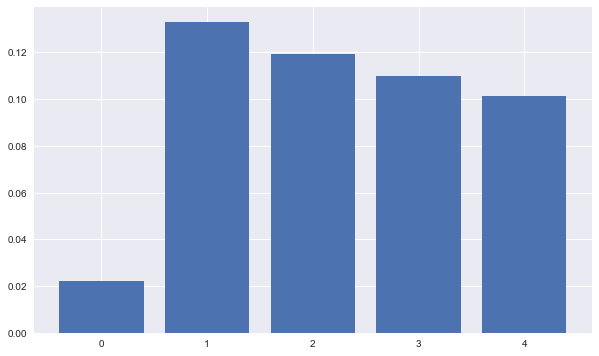

In [13]:
num_topics = 5
svd = decomposition.TruncatedSVD(n_components=num_topics)
doctopic = svd.fit_transform(X)
plt.figure(figsize = (10,6))
plt.bar(range(num_topics),svd.explained_variance_ratio_);

In [118]:
space.iloc[0]

atom             0.088992
charge           0.070134
classical        0.235246
complete              NaN
connection            NaN
consequence      0.117623
contrast              NaN
court                 NaN
crime                 NaN
criminal              NaN
detector         0.235246
due              0.202998
electron         0.117623
everyday              NaN
example               NaN
expect                NaN
experiment            NaN
field                 NaN
figure                NaN
found            0.101499
generally             NaN
give                  NaN
include               NaN
individual            NaN
investigation    0.117623
light            0.202998
matter           0.588115
modern                NaN
motion           0.507495
physic           0.177984
process               NaN
related          0.117623
see              0.117623
serious          0.117623
show                  NaN
supreme               NaN
therefore        0.117623
time             0.117623
tiny        

## Below I just copied and pasted code for an RNN (Recurrent Neural Network)

In [14]:
# keras
np.random.seed(13)
import keras
from keras.models import Sequential
from keras.layers import Dense, Embedding, Reshape, Activation, SimpleRNN, GRU, LSTM, Bidirectional, Convolution1D, MaxPooling1D, Merge, Dropout
from IPython.display import SVG
from keras.utils import np_utils
from keras.utils.data_utils import get_file
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import model_to_dot, plot_model
from keras.datasets import imdb, reuters
from keras.preprocessing import sequence
from keras.optimizers import SGD, RMSprop

Using Theano backend.


In [35]:
# Defining a custom lemmatizer/tokenizer with stopwords

def get_wordnet_pos_aux(word):
    
    treebank_tag = pos_tag([word])[0][1]
    
    if treebank_tag.startswith('J'):
        return word, wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return word, wordnet.VERB
    elif treebank_tag.startswith('N'):
        return word, wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return word, wordnet.ADV
    else:
        return word, 'n'
    
def get_wordnet_pos(words):
    return [get_wordnet_pos_aux(x) for x in words]

class Lemmatizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return "".join([ x + ' ' for x in 
                        [self.wnl.lemmatize(t1,t2) for t1,t2 in get_wordnet_pos(word_tokenize(doc))]])
    
stop = stopwords.words('english')
stop += ['.', ',', '(', ')', "'", '"',"''",'""',"``",'”', '“']
stop = set(stop)

In [42]:
# For simplicity, one "sentence" per line & ensuring a count of two words min

ltzr = Lemmatizer()
corpus = [sentence for sentence in corpus if sentence.count(" ") >= 2]

corpus = [ltzr(c).encode('utf-8', 'ignore') for c in corpus]
#print(corpus)

# Tokenize using Keras
my_filter='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'
tokenizer = Tokenizer(filters=my_filter)
tokenizer.fit_on_texts(corpus)

# Convert tokenized sentences to sequence format
sequences = tokenizer.texts_to_sequences(corpus)
nb_samples = sum(len(s) for s in corpus)

# Vocab size
V = len(tokenizer.word_index) + 1

# Dimension of our network
dim = 100
window_size = 6

# What is this output? 
#sequences

[[5,
  1,
  151,
  152,
  2,
  20,
  1,
  153,
  7,
  82,
  154,
  6,
  83,
  4,
  16,
  84,
  3,
  3,
  155,
  85,
  156,
  32,
  86,
  87,
  33,
  86,
  157,
  4,
  158,
  7,
  4,
  88,
  7,
  10,
  6,
  83,
  4,
  16,
  159,
  3,
  89,
  160,
  2,
  90,
  15,
  3,
  161,
  162,
  163,
  164,
  1,
  165,
  4,
  166,
  5,
  91,
  167,
  25,
  34,
  168,
  8,
  91,
  32,
  2,
  92,
  169,
  170,
  171,
  6,
  172,
  4,
  173,
  35,
  2,
  10,
  93,
  10,
  174,
  94,
  4,
  54,
  32,
  175,
  36,
  35,
  4,
  95,
  2,
  21,
  55,
  1,
  176,
  56,
  177,
  25,
  178,
  7,
  179,
  8,
  36,
  33,
  2,
  21,
  4,
  37,
  7,
  10,
  2,
  19,
  96,
  180,
  181,
  182,
  6,
  36,
  97,
  87,
  33,
  183,
  38,
  1,
  184,
  185,
  2,
  1,
  186,
  187,
  2,
  21,
  188,
  1,
  189,
  1,
  9,
  6,
  1,
  98,
  190,
  1,
  33,
  2,
  21,
  4,
  99,
  100,
  2,
  10,
  191,
  25,
  192,
  8,
  193,
  57,
  96,
  4,
  16,
  194,
  101,
  11,
  39,
  195,
  25,
  196,
  58,
  8,
  22,
  197,
  

In [54]:
def generate_data(sequences, window_size, V):
    maxlen = window_size*2
    
    # For each line (sentence)
    for line in sequences:
        L = len(line)
        # Choose the target word
        for index, word in enumerate(line):
            # Create the window
            s = index-window_size
            e = index+window_size+1
                    
            in_words = []
            context_words = []
            # Create the input/outputs for skipgrams
            for i in range(s, e):
                if i != index and 0 <= i < L:
                    #in_words.append([word])
                    context_words.append(line[i])
            x = word
            y = context_words

            #x = np.array(in_words,dtype=np.int32)
            #y = np_utils.to_categorical(context_words, V)
            yield(x,y)

In [70]:
def print_window(x,y):
    index = tokenizer.word_index
    print(index.keys()[index.values().index(x)])
    print(map(lambda n: index.keys()[index.values().index(n)],y))

In [97]:
win_size = 4
count = 0
for x,y in generate_data(sequences, win_size, V):
    if [x] in tokenizer.texts_to_sequences(["charge", "state"]):
        print(count)
        print_window(x, y)
        count += 1

0
charge
['due', 'to', 'motion', 'of', 'constituent', 'density', 'stiffness', 'colour']
1
charge
['of', 'mass', 'e', 'and', 'constrain', 'by', 'the', 'quantum']
2
charge
['investigation', 'arrest', 'filing', 'of', 'trial', 'and', 'appeal']
3
charge
['court', 'disallowed', 'a', 'murder', 'against', 'keeler', 'under', 'california']
4
charge
['constant', 'h', 'the', 'elementary', 'e', 'and', 'the', 'boltzmann']
5
charge
['a', 'polarizers', 'for', 'rotate', 'rotating', 'charge', 'be', 'present']
6
charge
['for', 'rotate', 'charge', 'rotating', 'be', 'present', 'in', 'every']
7
state
['classical', 'everyday', 'case', 'the', 'of', 'a', 'quantum', 'system']
8
state
['a', 'general', 'oven', 'particle', 'sometimes', 'give', 'up', 'say']
9
state
['atom', 'in', 'an', 'oven', 'have', 'no', 'intrinsic', 'orientation']
10
state
['either', 'in', 'an', 'up', 'or', 'in', 'a', 'down']
11
state
['or', 'in', 'a', 'down']
12
state
['violates', 'a', 'federal', 'or', 'criminal', 'statute', 'or', 'in']
13
sta

In [114]:
Y = np.array(2*[3]+2*[1]+3*[3]+5*[1]+6*[2]).reshape(-1,1)

In [111]:
maxlen = 2*win_size
Z = []
X = []
for x,y in generate_data(sequences, win_size, V):
    if [x] in tokenizer.texts_to_sequences(["charge", "state"]):
        X.append(x)
        Z.append(y)
        
Z = sequence.pad_sequences(Z, maxlen=maxlen)
X = np.array(X).reshape(-1,1)
X = np.concatenate([X,Z], axis = 1)
print(X)

[[ 19  37   7  10   2  96 180 181 182]
 [ 19   2 210 106   6 211  11   1  41]
 [ 19   0  90 234 235   2 236   6 237]
 [ 19  27 255   3 256 113  46 257  14]
 [ 19  73 345   1 346 106   6   1 347]
 [ 19   3 361  15 362 363  19   4 364]
 [ 19  15 362  19 363   4 364   5 365]
 [ 13  39  72 378   1   2   3  41  78]
 [ 13   3 145  77 144 146  43  70 147]
 [ 13   9   5  17  77  34  54 104 388]
 [ 13 389   5  17  70  48   5   3 148]
 [ 13   0   0   0   0  48   5   3 148]
 [ 13 391   3 392  48  18  30  48   5]
 [ 13   0   0   0   0  52  42  99  81]
 [ 13  52  42  99  81  30  51  12 131]
 [ 13  51  12 131   3  66 397 398  13]
 [ 13  13  66 397 398  30  52 399  56]
 [ 13  12  11 411   1  66   6  14  53]]


In [115]:
print(X.shape, Y.shape)

((18, 9), (18, 1))


## Building a RNN

In [92]:
from sklearn.model_selection import train_test_split

In [116]:
# Train, test, split
X_train,X_test, y_train,  y_test = train_test_split(X,Y)

nb_epoch = 20

In [108]:
y_train

array([2, 1, 1, 1, 3, 2, 1, 1, 3, 2, 1, 2, 2])

In [119]:
max_features = 2000
# cut texts after this number of words (among top max_features most common words)
batch_size = 32

model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen+1))
# Bidirectional LSTM!!!
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [120]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          nb_epoch=nb_epoch,
          validation_data=[X_test, y_test])

Train...
Train on 13 samples, validate on 5 samples
Epoch 1/20
13/13 [==============================] - 0s - loss: 0.6886 - acc: 0.3846 - val_loss: 0.6491 - val_acc: 0.2000
Epoch 2/20
13/13 [==============================] - 0s - loss: 0.6386 - acc: 0.4615 - val_loss: 0.6198 - val_acc: 0.2000
Epoch 3/20
13/13 [==============================] - 0s - loss: 0.6152 - acc: 0.4615 - val_loss: 0.5893 - val_acc: 0.2000
Epoch 4/20
13/13 [==============================] - 0s - loss: 0.5720 - acc: 0.4615 - val_loss: 0.5570 - val_acc: 0.2000
Epoch 5/20
13/13 [==============================] - 0s - loss: 0.5289 - acc: 0.4615 - val_loss: 0.5220 - val_acc: 0.2000
Epoch 6/20
13/13 [==============================] - 0s - loss: 0.4795 - acc: 0.4615 - val_loss: 0.4835 - val_acc: 0.2000
Epoch 7/20
13/13 [==============================] - 0s - loss: 0.4458 - acc: 0.4615 - val_loss: 0.4410 - val_acc: 0.2000
Epoch 8/20
13/13 [==============================] - 0s - loss: 0.3799 - acc: 0.4615 - val_loss: 0.393

In [121]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          nb_epoch=nb_epoch,
          validation_data=[X_test, y_test])

Train...
Train on 13 samples, validate on 5 samples
Epoch 1/20
13/13 [==============================] - 0s - loss: -1.4877 - acc: 0.4615 - val_loss: -1.4663 - val_acc: 0.2000
Epoch 2/20
13/13 [==============================] - 0s - loss: -1.7595 - acc: 0.4615 - val_loss: -1.8069 - val_acc: 0.2000
Epoch 3/20
13/13 [==============================] - 0s - loss: -2.2424 - acc: 0.4615 - val_loss: -2.1999 - val_acc: 0.2000
Epoch 4/20
13/13 [==============================] - 0s - loss: -2.6448 - acc: 0.4615 - val_loss: -2.6534 - val_acc: 0.2000
Epoch 5/20
13/13 [==============================] - 0s - loss: -2.8932 - acc: 0.4615 - val_loss: -3.1758 - val_acc: 0.2000
Epoch 6/20
13/13 [==============================] - 0s - loss: -3.7926 - acc: 0.4615 - val_loss: -3.7741 - val_acc: 0.2000
Epoch 7/20
13/13 [==============================] - 0s - loss: -4.5135 - acc: 0.4615 - val_loss: -4.4530 - val_acc: 0.2000
Epoch 8/20
13/13 [==============================] - 0s - loss: -5.3410 - acc: 0.4615 - 

In [122]:
model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          nb_epoch=nb_epoch,
          validation_data=[X_test, y_test])

Train...
Train on 13 samples, validate on 5 samples
Epoch 1/20
13/13 [==============================] - 0s - loss: -12.0416 - acc: 0.4615 - val_loss: -14.4971 - val_acc: 0.2000
Epoch 2/20
13/13 [==============================] - 0s - loss: -12.5488 - acc: 0.4615 - val_loss: -15.2021 - val_acc: 0.2000
Epoch 3/20
13/13 [==============================] - 0s - loss: -12.9203 - acc: 0.4615 - val_loss: -15.7227 - val_acc: 0.2000
Epoch 4/20
13/13 [==============================] - 0s - loss: -13.1556 - acc: 0.4615 - val_loss: -15.9424 - val_acc: 0.2000
Epoch 5/20
13/13 [==============================] - 0s - loss: -13.2421 - acc: 0.4615 - val_loss: -15.9424 - val_acc: 0.2000
Epoch 6/20
13/13 [==============================] - 0s - loss: -13.2583 - acc: 0.4615 - val_loss: -15.9424 - val_acc: 0.2000
Epoch 7/20
13/13 [==============================] - 0s - loss: -13.2970 - acc: 0.4615 - val_loss: -15.9424 - val_acc: 0.2000
Epoch 8/20
13/13 [==============================] - 0s - loss: -13.1605 -